In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt

In order to understand how to get to the CMB power spectrum, let us first recall the definition of the spherical harmonics transform of the CMB temperature field
$$ T(\hat{n})=\sum_{\ell m}a_{\ell m}Y_{\ell m}(\hat{n}) $$
The CMB power spectrum, on the other hand, is simply defined as the expectation value of the square of the spherical harmonics coefficients
$$ C_{\ell} \equiv \langle |a_{\ell m}^2| \rangle = \langle a_{\ell m}a^*_{\ell m} \rangle $$
Note that, in principle, this function should have two subscripts, $C_{\ell m}$, but because we assume that the universe is isotropic, it must have the same power spectrum towards both the x, y and z directions, and this implies full rotational invariance. As a result, there is no $m$ dependence in the power spectrum, and we simply average over $m$, and only call the spectrum $C_{\ell}$.

In [27]:
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}
l_max_scalars = 3000
l_max_tensors = 600

In [34]:
cosmo = Class()
cosmo.set(common_settings)
cosmo.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,
       'l_max_scalars':l_max_scalars,'l_max_tensors':l_max_tensors})
cosmo.compute()

In [35]:
cl_tot = cosmo.raw_cl(l_max_scalars)

In [36]:
cl_tot.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [37]:
print(cl_tot['ell'])

[   0    1    2 ... 2998 2999 3000]


In [38]:
print(cl_tot['ee'])

[0.00000000e+00 0.00000000e+00 6.65205687e-15 ... 8.00247998e-20
 7.93566567e-20 7.86957720e-20]


### I removed the first two values bc they are zero and they have a bad representation in loglog

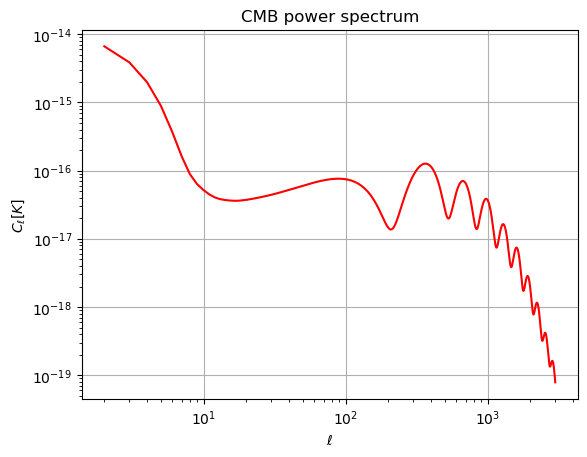

In [45]:
plt.loglog(cl_tot['ell'][2:],cl_tot['ee'][2:], color='r')
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}[K]$')
plt.title('CMB power spectrum')
plt.grid(True)